# Linear Regression – California Housing Dataset
## AI & ML Task 1


In [1]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# 1. Load Dataset
print("Loading dataset...")
housing = fetch_california_housing() 
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="MedianHouseValue")

# Display first few rows
print("\n--- Feature Head ---")
print(X.head())
print("\n--- Target Head ---")
print(y.head())

Loading dataset...

--- Feature Head ---
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

--- Target Head ---
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedianHouseValue, dtype: float64


In [3]:
# 2. Exploratory Data Analysis (EDA)
print("\n --- Data Description ---")
print(X.describe())


 --- Data Description ---
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        

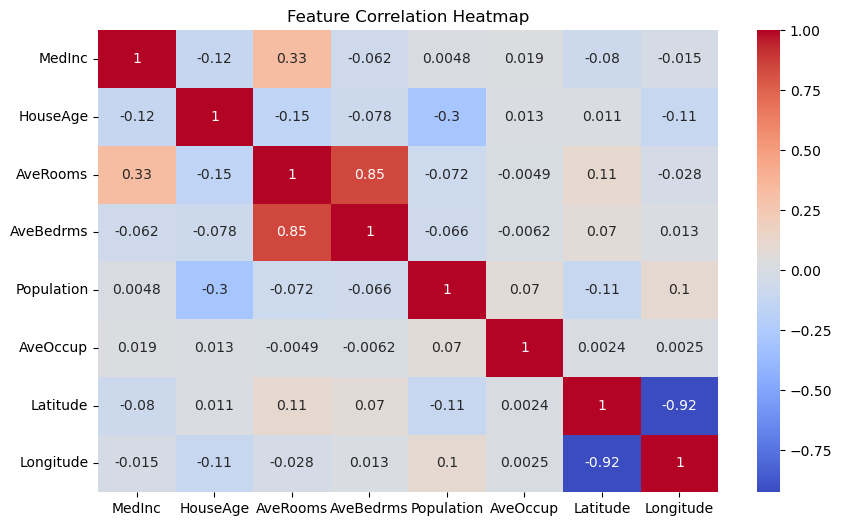

In [4]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

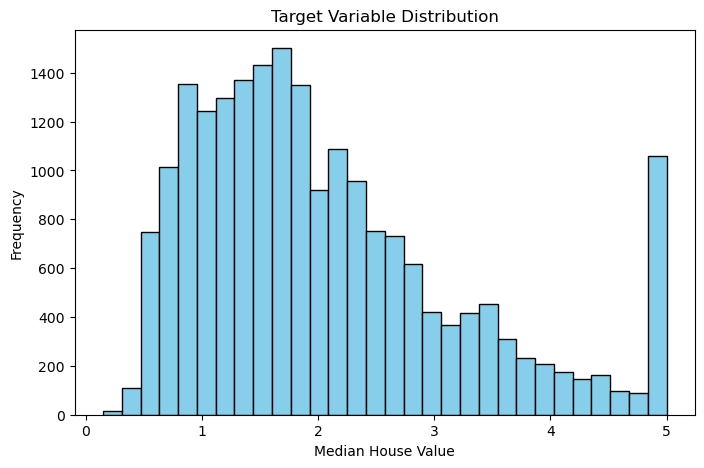

In [5]:
# Target Distribution
plt.figure(figsize=(8,5))
plt.hist(y, bins=30, color="skyblue", edgecolor= 'black')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Target Variable Distribution")
plt.show()

In [6]:
# 3. Train-Test Split
print("\n Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)


 Splitting data...


In [7]:
# 4. Model Training(Linear Regression)
print("Training model...")
model = LinearRegression()
model.fit(X_train, y_train)

Training model...


LinearRegression()

In [8]:
# 5. Model Evaluation
y_pred = model.predict(X_test)
mae =mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Model Performance ---")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")


--- Model Performance ---
MAE: 0.5332
RMSE: 0.7456
R2: 0.5758


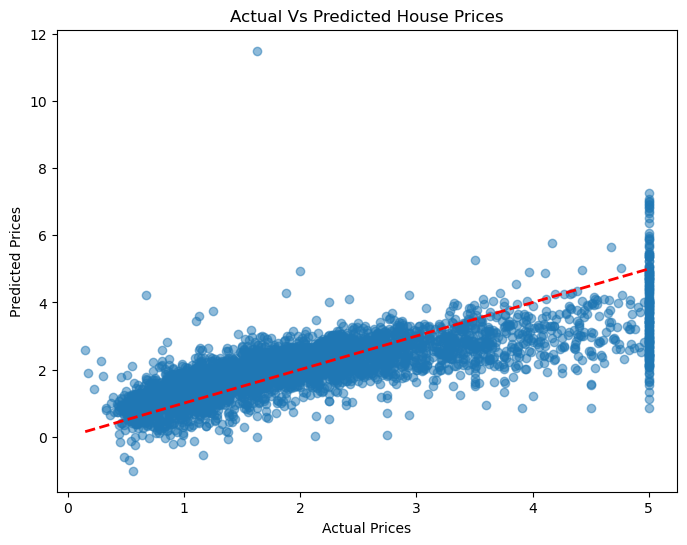

In [9]:
# 6. Actual Vs Predicted Plot

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Vs Predicted House Prices")
plt.show()

In [10]:
# 7. Feature Importance
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by= "Coefficient", ascending= False)

print("\n--- Feature Importance ---")
print(coefficients)


--- Feature Importance ---
      Feature  Coefficient
3   AveBedrms     0.783145
0      MedInc     0.448675
1    HouseAge     0.009724
4  Population    -0.000002
5    AveOccup    -0.003526
2    AveRooms    -0.123323
6    Latitude    -0.419792
7   Longitude    -0.433708


In [11]:
# 8. Save Model
print("\n Saving model to 'house_price_model.pkl'...")
with open("house_price_model.pkl", "wb") as f:
    pickle.dump(model, f)
print("Model saved successfully.")


 Saving model to 'house_price_model.pkl'...
Model saved successfully.
